In [2]:
def nombre():
    '''Laboratorio 1 Unidad 2 sobre árboles de decisión
Nombre: Bayron Landeta
ID: LOO376549'''
    
print(nombre.__doc__)

Laboratorio 1 Unidad 2 sobre árboles de decisión
Nombre: Bayron Landeta
ID: LOO376549


In [3]:
def importacion():
    '''Realizamos la importación de las librerías necesarias para el laboratorio de SVM'''
print(importacion.__doc__)

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

Realizamos la importación de las librerías necesarias para el laboratorio de SVM


In [6]:
def cargar():
    '''Cargamos la base de datos del repositorio de comportadio por el docente'''
print(cargar.__doc__)

pima = pd.read_csv("Dataset_of_Diabetes.csv")
pima.head()

Cargamos la base de datos del repositorio de comportadio por el docente


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [7]:
def descrip():
    '''Realizamos los respectivos cambios de variables, pero antes de esto se realizó una limpieza a la data set\n\n'''
print(descrip.__doc__)

transf1 = {'F':0,'M':1}
pima['Gender'] = pima['Gender'].map(transf1)
transf2 = {'N':0,'Y':1, 'P':2}
pima['CLASS'] = pima['CLASS'].map(transf2)

Realizamos los respectivos cambios de variables, pero antes de esto se realizó una limpieza a la data set




In [9]:
def car():
    '''Determinación de variables objetivo (dependientes) y características (independientes)'''
print(car.__doc__)

feature_cols = ['ID', 'No_Pation', 'Gender', 'Chol', 'AGE', 'Urea', 'Cr', 'HbA1c', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']
X = pima[feature_cols] # features
y = pima.CLASS # target

Determinación de variables objetivo (dependientes) y características (independientes)


In [10]:
def modelo():
    '''Modelo (entrenamiento y test)
Divide el conjunto de datos en una proporción de entrenamiento y de prueba'''
print(modelo.__doc__)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Modelo (entrenamiento y test)
Divide el conjunto de datos en una proporción de entrenamiento y de prueba


In [15]:
def obj():
    '''Creamos el objeto clasificador del árbol de decisión'''
print(obj.__doc__)
clf = DecisionTreeClassifier()

def entr():
    '''Entrenamos el clasificador del árbol de decisión'''
print(entr.__doc__)
clf = clf.fit(X_train,y_train)

def pre():
    '''Predecimos que la respuesta para el conjunto de datos de prueba'''
print(pre.__doc__)
y_pred = clf.predict(X_test)

Creamos el objeto clasificador del árbol de decisión
Entrenamos el clasificador del árbol de decisión
Predecimos que la respuesta para el conjunto de datos de prueba


In [14]:
def Eval():
    '''Obtenemos los resultados de la evaluación del modelo, mediante Accuracy\n'''
print(Eval.__doc__)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Obtenemos los resultados de la evaluación del modelo, mediante Accuracy

Accuracy: 0.9633333333333334


## Visualizing the tree

We will plot the tree to see its root, branches, and nodes using the following functions:

* **StringIO()**: creates an object (empty in this case) to receive a string buffer (the tree will be created first as a string before as an image) in DOT (graph description language) format.
* **export_graphviz()**: this function exports the tree in DOT format, generating a representation of the decision tree, which is written into the ‘out_file’.
* **graph_from_dot_data()**: will use the DOT object to create the graph.
* **Image()**: uses raw data to return an image (png, jpeg, gif).

In [12]:
def importacion():
    '''Realizamos la importación de las librerías necesarias para la for decision tree visualization'''
print(importacion.__doc__)

from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus

Realizamos la importación de las librerías necesarias para la for decision tree visualization


FRealizamos la visualización del árbol de decisión


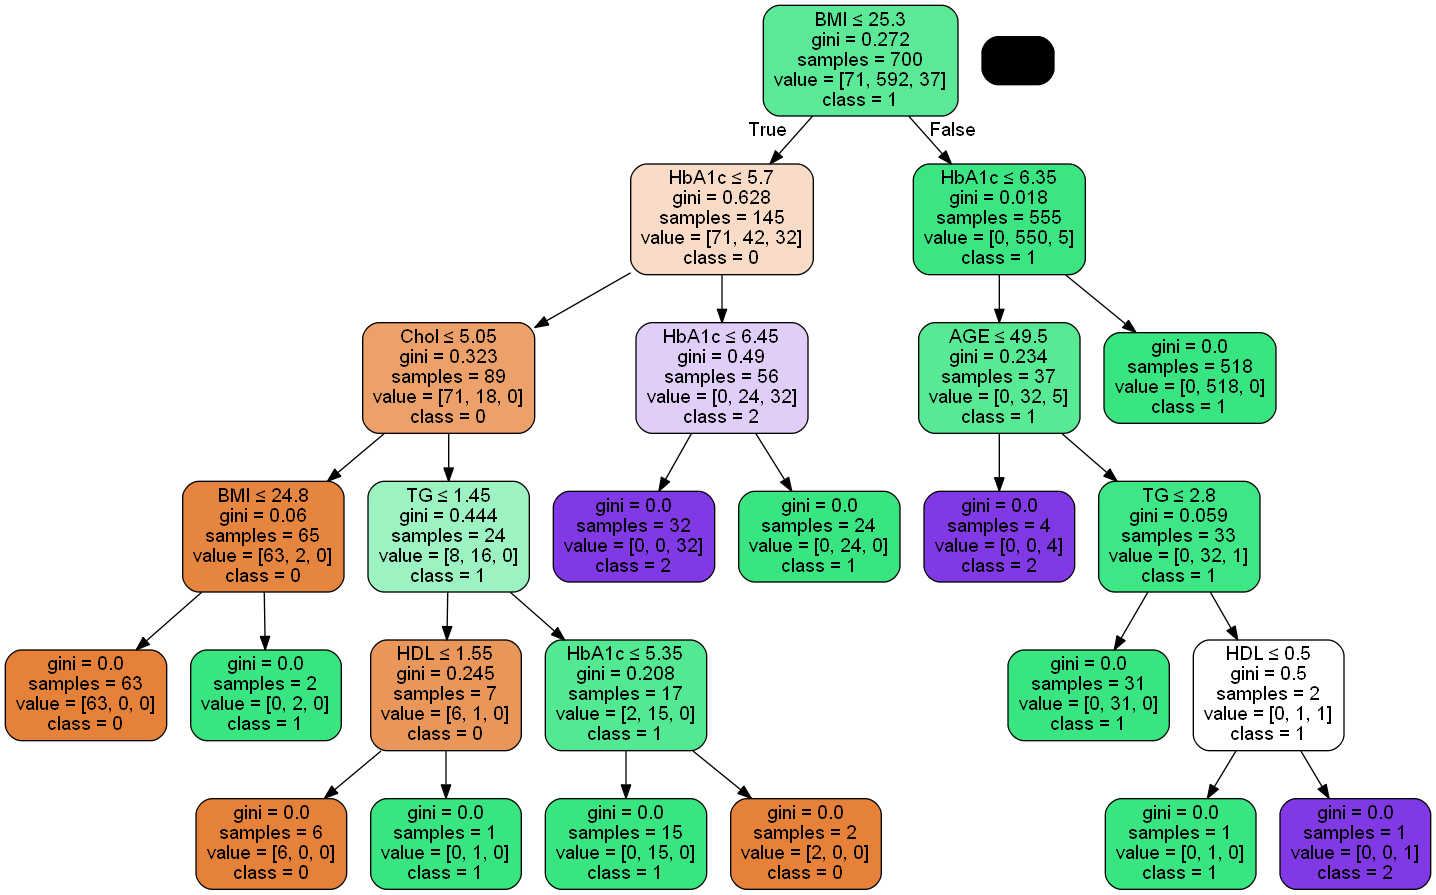

In [13]:
def obj():
    '''FRealizamos la visualización del árbol de decisión'''
print(obj.__doc__)


dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1', '2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

## Pruning

The complete decision tree is difficult to interpret due to the complexity of the outcome. Pruning/shortening a tree is essential to ease our understanding of the outcome and optimize it. This optimization can be done in one of three ways:

* **criterion**: optional (default="gini") or Choose attribute selection measure

Defines what function will be used to measure the quality of a split. The options are "gini" and "entropy". The Gini ratio measures the impurity of the node in a decision tree. One can assume that a node is pure when all of its records belong to the same class.

* **splitter**: string, optional (default="best") or Split Strategy

Defines the strategy used to choose the split at each node. Supported strategies are "best" to choose the best split and "random" to choose the best random split.

* **max_depth**: int or None, optional (default=None) or Maximum Depth of a Tree

Defines the maximum depth of the tree. If it’s None, the tree will be as long as possible, when all the leaves are pure (risk of overfitting the model).

In [17]:
def obj():
    '''Creamos el objeto clasificador del árbol de decisión'''
print(obj.__doc__)
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

def entr():
    '''Entrenamos el clasificador del árbol de decisión'''
print(entr.__doc__)
clf = clf.fit(X_train,y_train)

def pre():
    '''Predecimos que la respuesta para el conjunto de datos de prueba\n\n'''
print(pre.__doc__)
y_pred = clf.predict(X_test)

def Eval():
    '''Obtenemos los resultados de la evaluación del modelo, mediante Accuracy\n'''
print(Eval.__doc__)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Creamos el objeto clasificador del árbol de decisión
Entrenamos el clasificador del árbol de decisión
Predecimos que la respuesta para el conjunto de datos de prueba


Obtenemos los resultados de la evaluación del modelo, mediante Accuracy

Accuracy: 0.9533333333333334


FRealizamos la visualización del árbol de decisión pre-podado


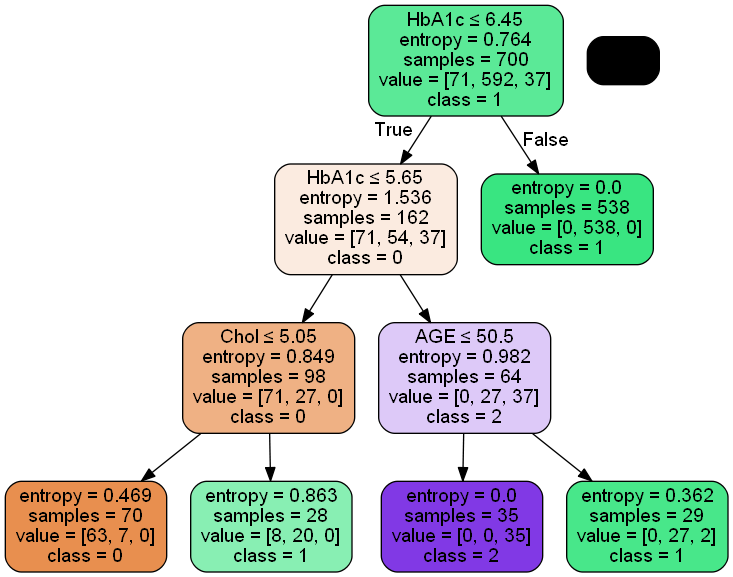

In [18]:
def obj():
    '''FRealizamos la visualización del árbol de decisión pre-podado'''
print(obj.__doc__)

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True, feature_names = feature_cols,class_names=['0','1', '2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes2.png')
Image(graph.create_png())

In [19]:
def Eval():
    '''Obtenemos los resultados de la evaluación del modelo, mediante Accuracy, Precision, y Recall\n'''
print(Eval.__doc__)


print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='micro' ))
print("Recall:", metrics.recall_score(y_test, y_pred, average='micro'))

Obtenemos los resultados de la evaluación del modelo, mediante Accuracy, Precision, y Recall

Accuracy: 0.9533333333333334
Precision: 0.9533333333333334
Recall: 0.9533333333333334


Realizamos la Matriz de confusión, haciendo uso de las librerias necesarias



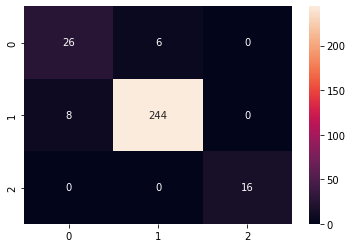

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pylab as pl

def Mat():
    '''Realizamos la Matriz de confusión, haciendo uso de las librerias necesarias\n'''
print(Mat.__doc__)


cm = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot=True,fmt= 'd')
pl.show()

In [1]:
def Matr():
    '''La matriz de confusión es un método de evaluación de rendimiento de un modelo de clasificación (a veces se usa en regresión). La matriz compara los valores reales con los predichos por el modelo de aprendizaje. Esto nos ayuda a ver que tan bien está funcionando nuestro modelo\n'''
print(Matr.__doc__)

La matriz de confusión es un método de evaluación de rendimiento de un modelo de clasificación (a veces se usa en regresión). La matriz compara los valores reales con los predichos por el modelo de aprendizaje. Esto nos ayuda a ver que tan bien está funcionando nuestro modelo

